In [2]:
#Importing the libraries
import os
import zipfile

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df='/content/drive/MyDrive/Covid_Dataset

In [ ]:
df1=zipfile.ZipFile(df, 'r')

In [ ]:
#Extracting the zipfile
df1.extractall('/content/drive/MyDrive/Covid_Dataset')

In [4]:
os.listdir('/content/drive/MyDrive/Covid_Dataset/Covid_Dataset')

['Covid', 'Normal']

In [5]:
#Concatnates various path components with exactly one directory and it creates a final path for a file or folder
train_covid_dir=os.path.join('/content/drive/MyDrive/Covid_Dataset/Covid_Dataset/Covid')

In [6]:
#Concatnates various path components with exactly one directory and it creates a final path for a file or folder
train_normal_dir=os.path.join('/content/drive/MyDrive/Covid_Dataset/Covid_Dataset/Normal')

In [7]:
#Dispaying whether images are present or not
train_covid_names=os.listdir(train_covid_dir)
print(train_covid_names[:15])

['COVID-1.png', 'COVID-10.png', 'COVID-100.png', 'COVID-101.png', 'COVID-102.png', 'COVID-103.png', 'COVID-104.png', 'COVID-105.png', 'COVID-106.png', 'COVID-107.png', 'COVID-108.png', 'COVID-109.png', 'COVID-11.png', 'COVID-110.png', 'COVID-111.png']


In [8]:
#Dispaying whether images are present or not
train_normal_names=os.listdir(train_normal_dir)
print(train_normal_names[:15])

['Normal-1.png', 'Normal-10.png', 'Normal-100.png', 'Normal-101.png', 'Normal-102.png', 'Normal-103.png', 'Normal-104.png', 'Normal-105.png', 'Normal-106.png', 'Normal-107.png', 'Normal-108.png', 'Normal-109.png', 'Normal-11.png', 'Normal-110.png', 'Normal-111.png']


In [9]:
#Displaying total length of training and testing images
print('Total training mask images:',len(os.listdir(train_covid_dir)))
print('Total training non-mask images:',len(os.listdir(train_normal_dir)))


Total training mask images: 600
Total training non-mask images: 600


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [11]:
#Parameters for our graph; we'll output images in a 4*4 configuration
nrows=4
ncols=4

In [6]:
#Importing the required libraries
import tensorflow as tf

In [7]:
#Importing the required libraries
from keras.models import Sequential

In [8]:
#Importing the required libraries
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [9]:
model = tf.keras.models.Sequential([
                                    #Note that input shape is the desired size of the image 300*300 with 3 byes of color
                                    #This is the first convolution
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #This is the second convolution
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #This is the third covolution
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #This is the fourth convolution
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #This is the fifth convolution
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #Flatten the resukts to feed into a DNN
                                    tf.keras.layers.Flatten(),
                                    #512 neuron hidden layer
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    #Only 1 output neuron. It will contain a value from 0-1 
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
#Displaying the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [11]:
from tensorflow.keras.optimizers import RMSprop

In [12]:
#Implementing the weights and loss model
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
#Image dataenerator shifting
train_datagen=ImageDataGenerator(rescale=1/255)

In [15]:
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Covid_Dataset/Covid_Dataset',                    #This is a source directory for training images
    target_size=(300,300),                                #All images will be resized to 150*150
    batch_size=32,
    #Since we use binary_crossentropy we use bnary losses
    class_mode='binary'
)

Found 1200 images belonging to 2 classes.


In [64]:
history=model.fit_generator(train_generator,steps_per_epoch=8,epochs=15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/15
8/8 [==============================] - 20s 2s/step - loss: 0.1507 - accuracy: 0.9417
Epoch 2/15
8/8 [==============================] - 21s 3s/step - loss: 0.1371 - accuracy: 0.9453
Epoch 3/15
8/8 [==============================] - 21s 3s/step - loss: 0.1553 - accuracy: 0.9258
Epoch 4/15
8/8 [==============================] - 22s 3s/step - loss: 0.1094 - accuracy: 0.9492
Epoch 5/15
8/8 [==============================] - 24s 3s/step - loss: 0.0464 - accuracy: 0.9833
Epoch 6/15
8/8 [==============================] - 21s 3s/step - loss: 0.1424 - accuracy: 0.9688
Epoch 7/15
8/8 [==============================] - 21s 3s/step - loss: 0.1226 - accuracy: 0.9609
Epoch 8/15
8/8 [==============================] - 21s 3s/step - loss: 0.1378 - accuracy: 0.9336
Epoch 9/15
8/8 [==============================] - 20s 2s/step - loss: 0.2692 - accuracy: 0.9167
Epoch 10/15
8/8 [==============================] - 21s 3s/step - loss: 0.0818 - accuracy: 0.9727
Epoch 11/15
8/8 [======================

In [119]:
model.save('/content/drive/MyDrive/covid_model.h5')

In [25]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [ ]:
train_acc=max(history.history['accuracy'])
train_loss=min(history.history['loss'])

In [ ]:
import pandas as pd
df=pd.DataFrame({'model_peformance':['train_accuracy','train_loss','test_accuracy','test_loss'],
                'Values':[train_acc,train_loss,test_acc,test_loss]})

In [ ]:
df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.title('Comparision of accuracy and loss values for CNN algorithm')
sns.barplot(x='model_peformance',y='Values',data=df)

In [26]:
import seaborn as sns

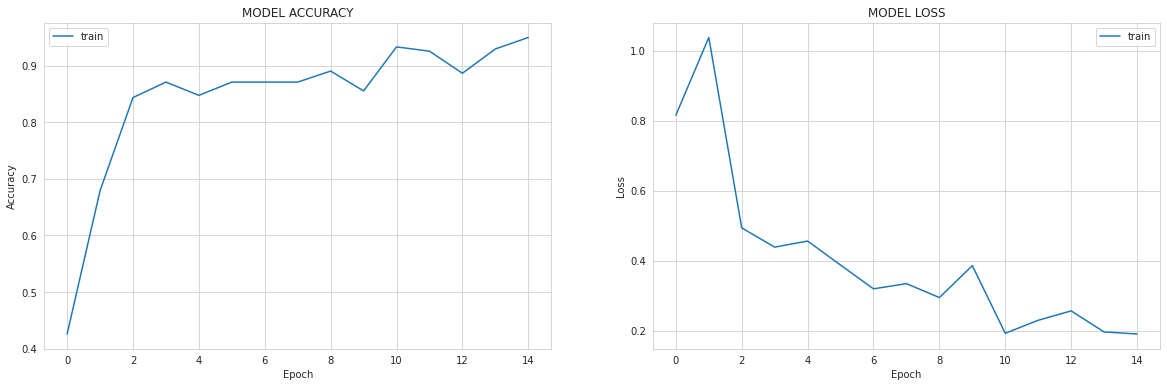

In [30]:
import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
fig.set_size_inches(20,6)
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
fig.set_size_inches(20,6)
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [18]:
from tensorflow.keras.applications.vgg16 import VGG16

In [19]:
base_model=VGG16(input_shape=(300,300,3),     #Shaoe of our images
                 include_top=False,           #Leave out the last fully connected layer
                 weights='imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [20]:
for layer in base_model.layers:
  layer.trainable=False

In [21]:
from keras import layers

In [22]:
#Flatten the output latyer to one dimension
x = layers.Flatten()(base_model.output)

#Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

#Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

#Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)


In [23]:
vgg_model=tf.keras.models.Model(base_model.input, x)

In [24]:
vgg_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='binary_crossentropy',metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [25]:
history1=vgg_model.fit(train_generator,steps_per_epoch=8, epochs=5)

Epoch 1/5
8/8 [==============================] - 233s 29s/step - loss: 1.1226 - acc: 0.6680
Epoch 2/5
8/8 [==============================] - 228s 28s/step - loss: 0.1545 - acc: 0.9492
Epoch 3/5
8/8 [==============================] - 253s 32s/step - loss: 0.1870 - acc: 0.9219
Epoch 4/5
8/8 [==============================] - 234s 29s/step - loss: 0.2471 - acc: 0.9180
Epoch 5/5
8/8 [==============================] - 229s 29s/step - loss: 0.1293 - acc: 0.9492


In [26]:
vgg_model.save('/content/drive/MyDrive/uvgg_covid_model.h5')

In [27]:
history1.history.keys()

dict_keys(['loss', 'acc'])

In [29]:
tr_acc=max(history1.history['acc'])
tr_loss=min(history1.history['loss'])

In [31]:
import pandas as pd
df1=pd.DataFrame({'model_peformance':['train_accuracy','train_loss'],
                'Values':[tr_acc,tr_loss]})

In [32]:
df1

,model_peformance,Values
0,train_accuracy,0.949219
1,train_loss,0.129313


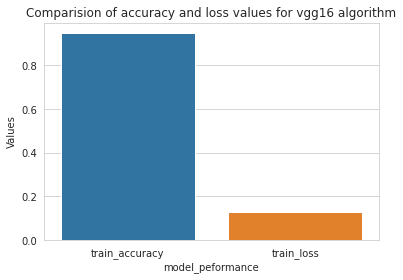

In [50]:
plt.title('Comparision of accuracy and loss values for vgg16 algorithm')
sns.barplot(x='model_peformance',y='Values',data=df1)

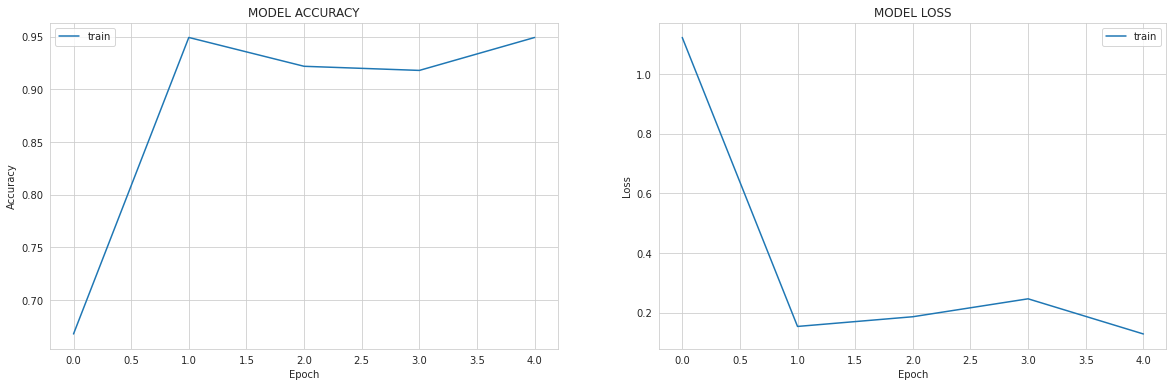

In [34]:
import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.plot(history1.history['acc'])
fig.set_size_inches(20,6)
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history1.history['loss'])
fig.set_size_inches(20,6)
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [35]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [36]:
base_model1=InceptionV3(input_shape=(300,300,3), include_top=False, weights='imagenet')

87924736/87910968 [==============================] - 0s 0us/step


In [37]:
for layer in base_model.layers:
  layer.trainable=False

In [38]:
from tensorflow.keras.optimizers import RMSprop

In [39]:
from keras import layers

In [40]:
x=layers.Flatten()(base_model1.output)
x=layers.Dense(1024,activation='relu')(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(1,activation='sigmoid')(x)

In [41]:
model2=tf.keras.models.Model(base_model1.input,x)

In [42]:
model2.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy',metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [52]:
history2=model2.fit_generator(train_generator,steps_per_epoch=8,epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
8/8 [==============================] - 247s 30s/step - loss: 0.1153 - acc: 0.9609
Epoch 2/10
8/8 [==============================] - 244s 30s/step - loss: 0.1379 - acc: 0.9570
Epoch 3/10
8/8 [==============================] - 248s 31s/step - loss: 0.0770 - acc: 0.9688
Epoch 4/10
8/8 [==============================] - 244s 30s/step - loss: 0.0256 - acc: 0.9883
Epoch 5/10
8/8 [==============================] - 235s 29s/step - loss: 0.0269 - acc: 0.9917
Epoch 6/10
8/8 [==============================] - 243s 30s/step - loss: 0.0653 - acc: 0.9727
Epoch 7/10
8/8 [==============================] - 250s 31s/step - loss: 0.2600 - acc: 0.9531
Epoch 8/10
8/8 [==============================] - 246s 31s/step - loss: 0.0441 - acc: 0.9922
Epoch 9/10
8/8 [==============================] - 229s 28s/step - loss: 0.0291 - acc: 0.9875
Epoch 10/10
8/8 [==============================] - 251s 31s/step - loss: 0.0721 - acc: 0.9883


In [53]:
model2.save('/content/drive/MyDrive/uincep_covid_model.h5')

In [46]:
history2.history.keys()

dict_keys(['loss', 'acc'])

In [47]:
tr_incep_acc=max(history1.history['acc'])
tr_incep_loss=min(history1.history['loss'])

In [48]:
import pandas as pd
df2=pd.DataFrame({'model_peformance':['train_accuracy','train_loss'],
                'Values':[tr_incep_acc,tr_incep_loss]})

In [49]:
df2

,model_peformance,Values
0,train_accuracy,0.949219
1,train_loss,0.129313


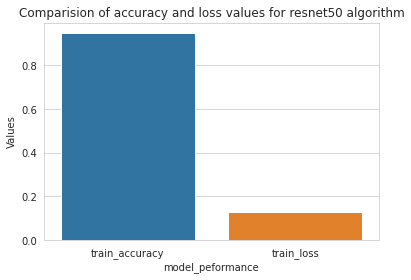

In [51]:
plt.title('Comparision of accuracy and loss values for resnet50 algorithm')
sns.barplot(x='model_peformance',y='Values',data=df2)

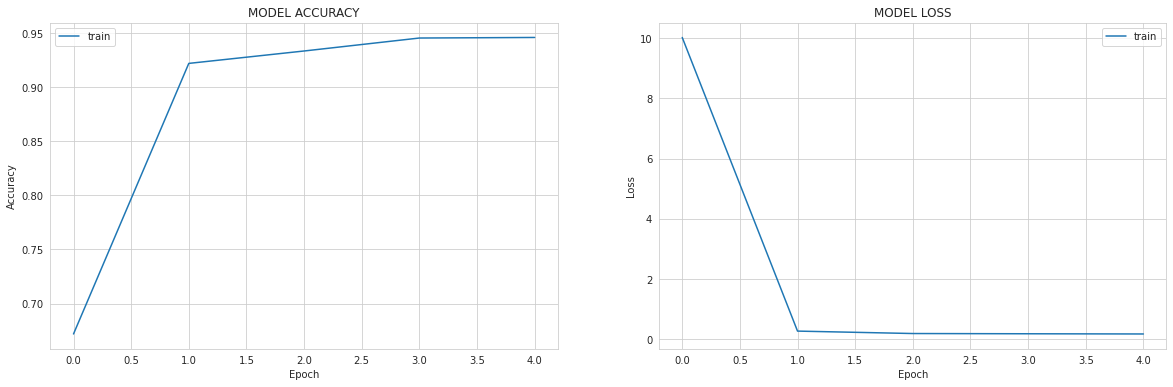

In [45]:
import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.plot(history2.history['acc'])
fig.set_size_inches(20,6)
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history2.history['loss'])
fig.set_size_inches(20,6)
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper right')
plt.show()